# Titanic - Machine Learning from Disaster

Hello, World! It's Kay, again.

I'm currently pursuing the Data Science & ML course from ZTM and I've just completed the Scikit-Learn module.
It's an attempt to see if I have managed to learn anything at all. Hehe! (If I did, then I'm supposed to build a better performing model for the competition.)

The following image contains a standard workflow which will be followed throughout the project.
![](https://raw.githubusercontent.com/commandantekaustav/Playing-with-the-Titanic-competition/main/ml101-6-step-ml-framework-tools-cropped.png)

## 1. Problem Definition

### Challenge Statement
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


**TL; DR;**
Predict survival status (<span style="color:red">Not</span> `Probability` as we already have the `label`) of a passenger by using their data.

## Data Desciption
### Data Dictionary

| Variable |	Definition |	Key |
|---|---|---|
| survival |	Survival |	0 = No, 1 = Yes |
| pclass |	Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex |	
| Age |	Age in years |	
| sibsp |	# of siblings / spouses aboard the Titanic |	
| parch |	# of parents / children aboard the Titanic |	
| ticket |	Ticket number |	
| fare |	Passenger fare |	
| cabin |	Cabin number |	
| embarked |	Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

## 0. Setting up The Environment

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
np.random.seed(0)

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# pd.plotting.register_matplotlib_converters()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [13]:
# Setting up aesthetics
sns.set_style(style='ticks')
sns.set(font_scale=1.2)

## Importing Data
### Exploring the Nature of the data

In [3]:
# Importing data
titanic_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Shape and Features
shape = titanic_df.shape
features = titanic_df.columns

print(f"Our data has the following shape {shape}")
print(f"Features present in our data are:",features.to_list(),sep="\n")

Our data has the following shape (891, 12)
Features present in our data are:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Exploring dtypes
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# EDA
## Numerical Data

In [8]:
# Performing some light data analysis

# Features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Cabin', 'Embarked', 'Ticket']

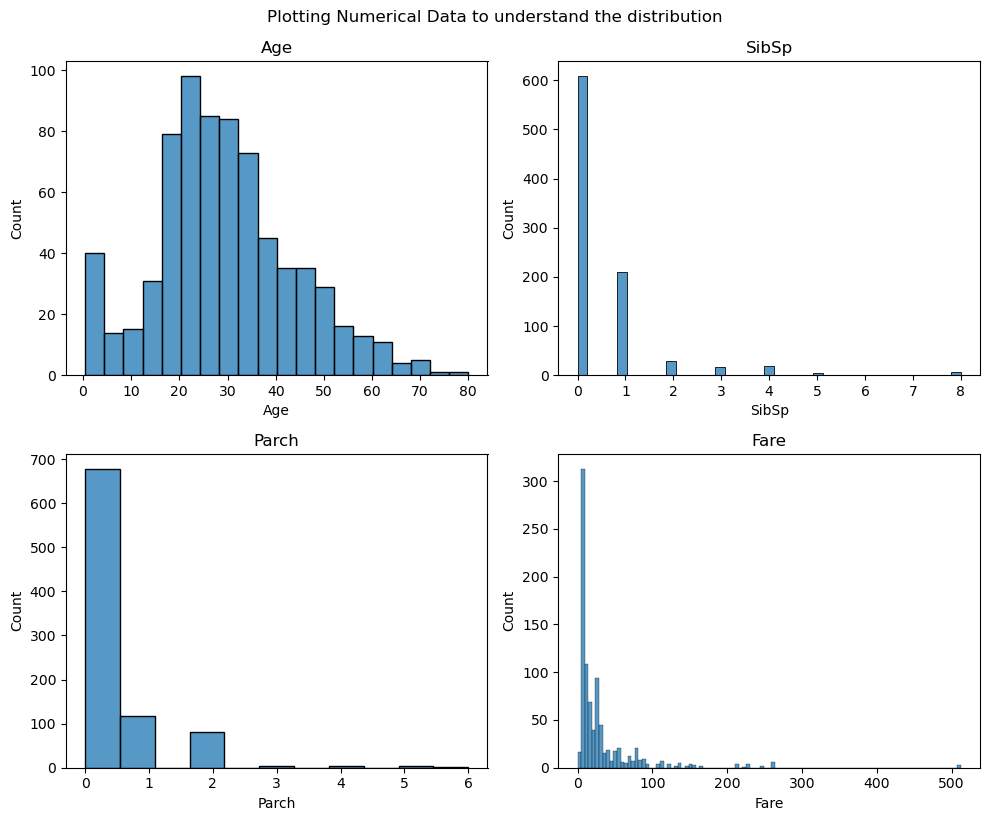

In [7]:
# Plotting Numerical Data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
sns.histplot(data=titanic_df, x='Age', ax = axes[0,0]).set_title('Age')
sns.histplot(data=titanic_df, x='SibSp', ax = axes[0,1]).set_title('SibSp')
sns.histplot(data=titanic_df, x='Parch', ax = axes[1,0]).set_title('Parch')
sns.histplot(data=titanic_df, x='Fare', ax = axes[1,1]).set_title('Fare')
plt.tight_layout()
plt.suptitle('Plotting Numerical Data to understand the distribution', y=1.02)
plt.show()

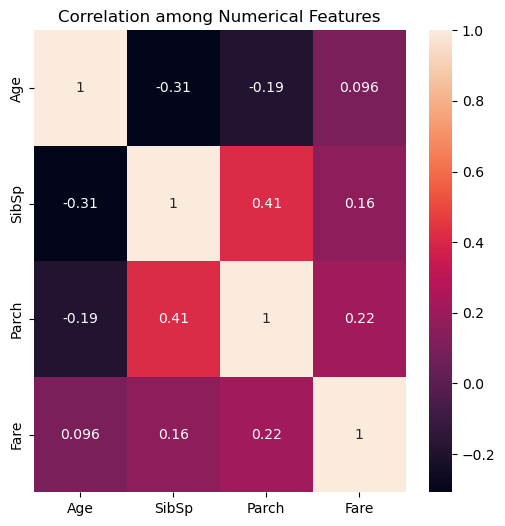

In [8]:
correlation_matrix = titanic_df[numerical_features].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True).set_title('Correlation among Numerical Features')
plt.show()

In [9]:
# Comparing survival status over Numerical Features 
pivot_table_df = pd.pivot_table(data = titanic_df, index = 'Survived', 
                                values = ['Age','SibSp','Parch','Fare'], 
                                aggfunc='mean').round(2) # Rounding of the cells by 2 digits
pivot_table_df

# Nyah, heatmaps won't work much in this case. :D
# plt.figure(figsize=(8, 2))
# sns.heatmap(pivot_table_df, annot=True, fmt=".2f")
# plt.title("Mean Values Heatmap - Titanic Dataset")
# plt.show()

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.63,22.12,0.33,0.55
1,28.34,48.40,0.46,0.47


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

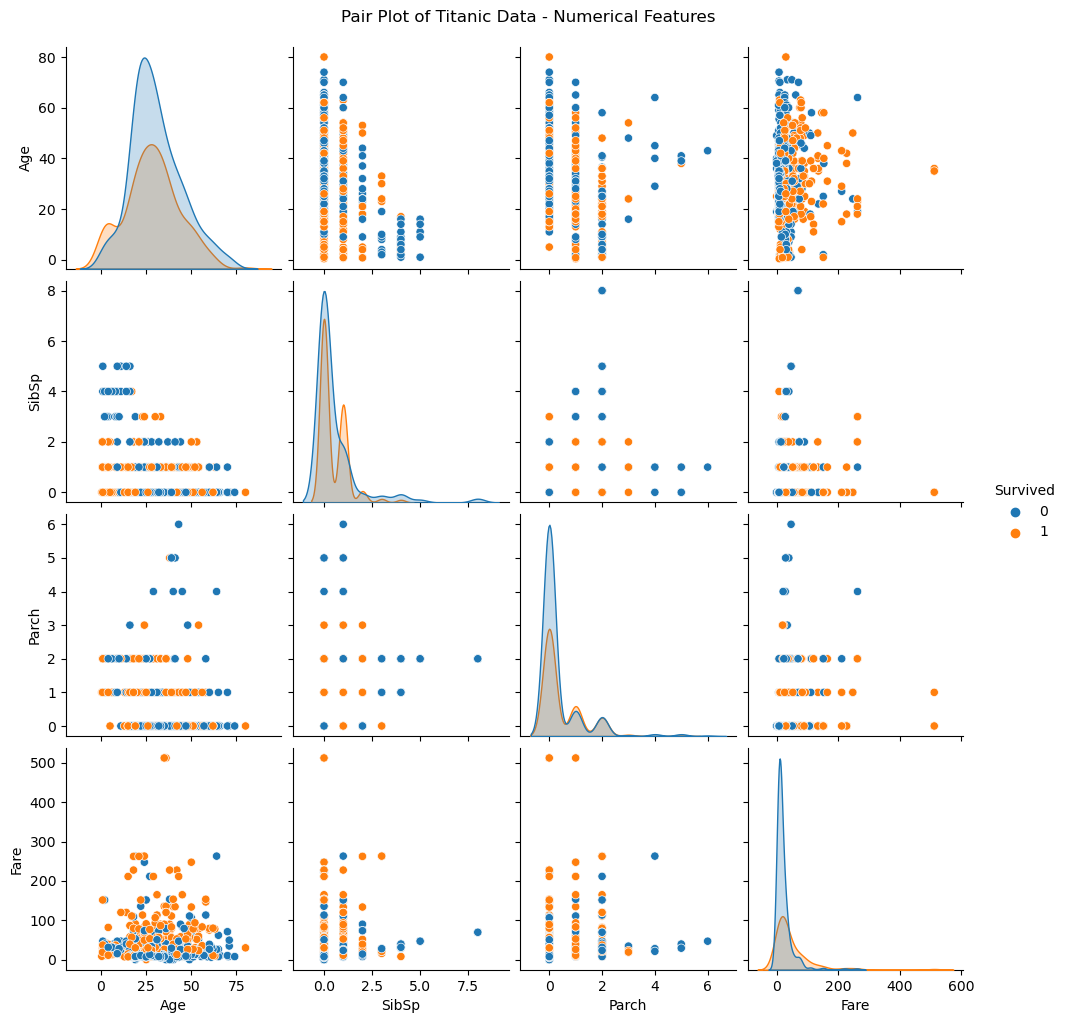

In [10]:
# Pairplotting of Numerical Data to fetch more insight

plt.figure(figsize=(10, 10))  
sns.pairplot(data=titanic_df, vars=numerical_features, kind='scatter', hue='Survived')
plt.suptitle("Pair Plot of Titanic Data - Numerical Features", y=1.02)
# plt.tight_layout(pad=1.2)
plt.show()

## Categorical Data

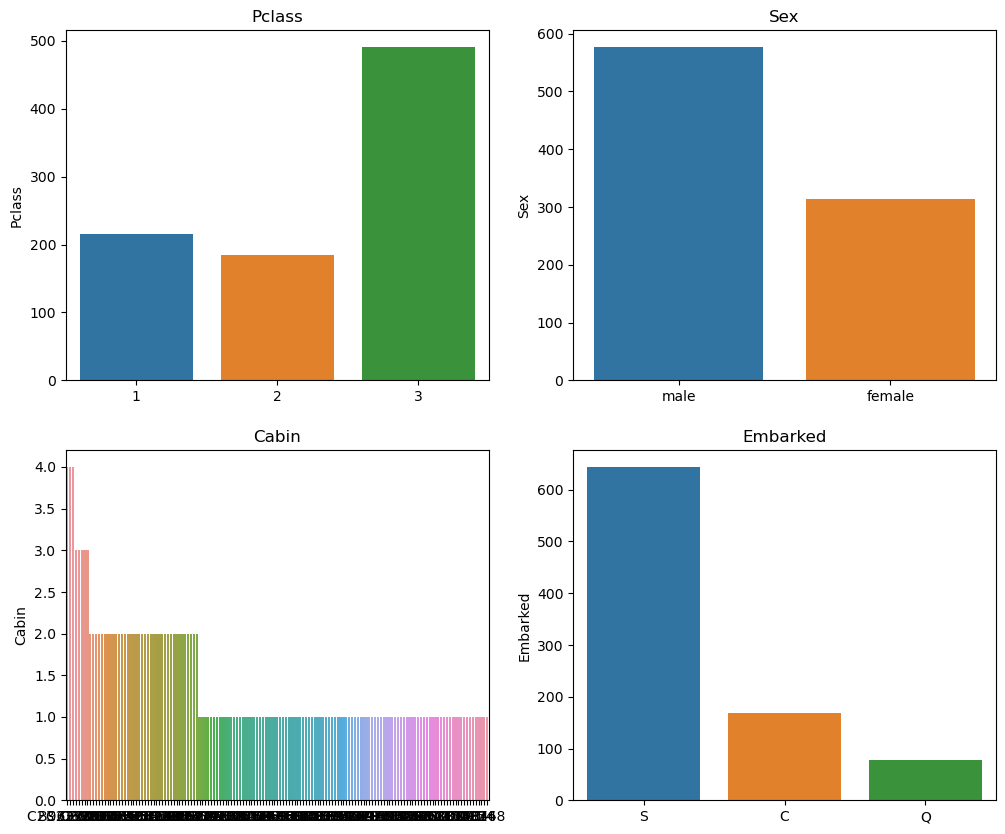

In [11]:
# for feature in categorical_features:
#     sns.barplot(x = titanic_df[feature].value_counts().index, 
#                 y = titanic_df[feature].value_counts()).set_title(feature)
#     plt.show()
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Loop through the categorical features and plot bar plots in separate subplots
for i, feature in enumerate(categorical_features[:4]): # Not selecting Ticket
    row = i // 2
    col = i % 2
    sns.barplot(x=titanic_df[feature].value_counts().index, y=titanic_df[feature].value_counts(), ax=axes[row, col])
    axes[row, col].set_title(feature)


In [12]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


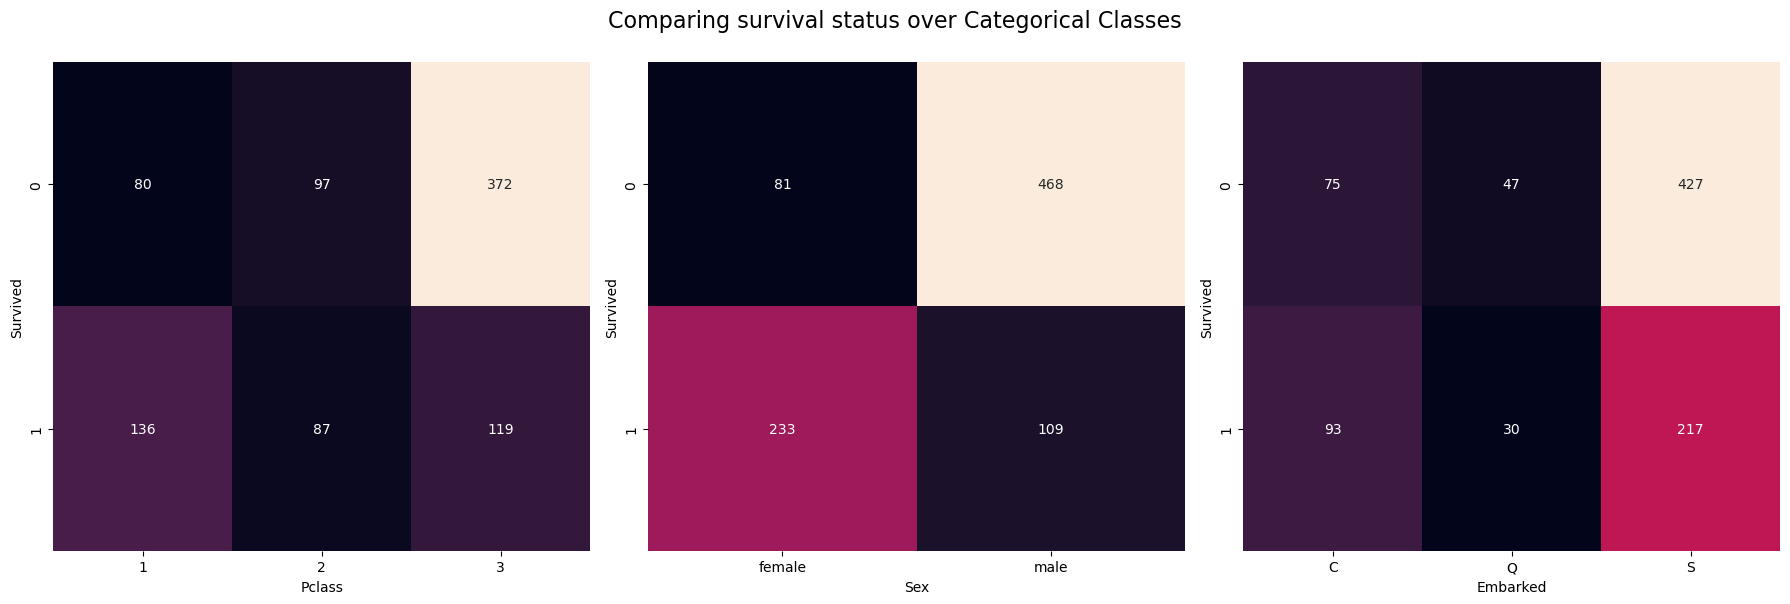

In [13]:
# Comparing survival over Categorical Classes

fig , axes = plt.subplots(1, 3, figsize=(18, 6))
plt.suptitle("Comparing survival status over Categorical Classes", y=1, fontsize=16)

sns.heatmap(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[0], cbar = False,
            annot=True, fmt="")
sns.heatmap(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[1], cbar = False,
            annot=True, fmt="")
sns.heatmap(pd.pivot_table(titanic_df, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'), 
            ax = axes[2], cbar = False,
            annot=True, fmt="")
plt.tight_layout()
plt.show()

## Detecting Missing Valus

In [14]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

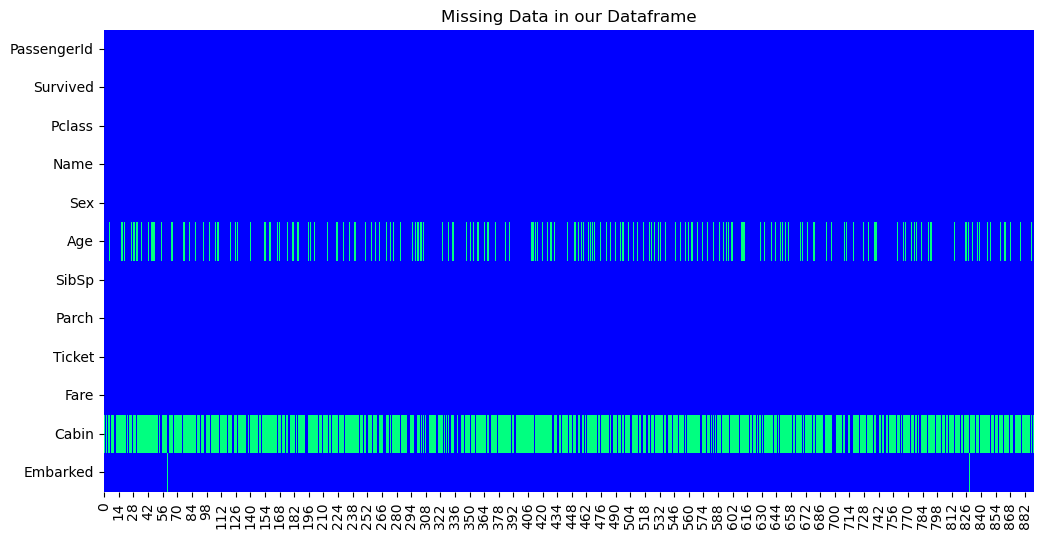

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(titanic_df.isna().transpose() ,cbar = False, cmap = 'winter').set_title('Missing Data in our Dataframe')
plt.show()

## Preprocessing Steps    

   - __Feature Encoding__
       + `Pclass` indicates the social/financial class/status of a person i.e., an ordinal relation between the categories hence I'm preserving the original data (numbers) hence they already have ordinal relation (1, 2, 3).
       + For `Sex` and `Embarked`, there are two (similar) ways of encoding them.
           * `pd.get_dummies(drop_first = True)`, which creates dummy variable following by dropping the firt category.
           * `OneHotEncoder(sparse=False)`, which does a binary encoding and returns a dense matrix. (similar)
   
   
   - __Handling Missing Values__
       + Almost 75% entries under the `Cabin` feature are blank so I'm dropping it. (Should I handle it in a different way next time?)
       + `Age` is fairly close to normal distribution and contains 18% of blank entries so It can be `imputed` by `mean` strategy.
       + `Embarked` has only two null values and has some `class imbalance` as `S` is high in number.
       + We can either 
           - [x] Drop those two records, or, 
           - [ ] Fill them with `mode` i.e., `S`      
   
   
   - __Feature Elimination__
       + Dropping `Name` and `PassengerId` as they do not seem to be of much relevance (read, 'Importance'). (Am I right about that?!)
       + Dropping `Cabin`

In [16]:
# New set of categorical features
categorical_features_2 = ['Pclass', 'Sex', 'Embarked']

In [214]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve, auc

# Setting up transformers 
numerical_transformer = Pipeline( steps= [
    ("imputer", SimpleImputer(strategy='median')),
    ("scaler", RobustScaler())
])
    

categorical_transformer = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Creating Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('numerical_transformer', numerical_transformer, numerical_features),
    ('categorical_transformer', categorical_transformer, categorical_features_2),
])

In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
lr = LogisticRegression(random_state=42)

base_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('lr', lr)
])

# rfc.get_params()

In [227]:
%%time

# Selecting X & y
X = titanic_df[numerical_features+categorical_features_2]
y = titanic_df.Survived

# Three set spliting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Base
base_pipeline.fit(X_train, y_train)
base_pipeline.score(X_test, y_test)

CPU times: user 33.9 ms, sys: 95 µs, total: 34 ms
Wall time: 33.1 ms


0.8268156424581006

In [230]:
cv_scores = cross_val_score(base_pipeline, X_train, y_train, cv=5)
cv_scores.mean()

0.7935290062050625

## Stepping UP

# Getting Data Ready

In [44]:
# Importing data
titanic_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# Shape and Features
shape = titanic_df.shape
features = titanic_df.columns

### Different Imputation Strategies


There are a number of different imputation strategies that can be used for the "age" variable in the Titanic dataset. Here are some of the most common strategies, along with their pros and cons:

+ Mean imputation: This is the simplest imputation strategy, and it involves replacing all missing values with the mean age of all passengers. This strategy is easy to implement, but it can introduce bias into the data, as it assumes that all passengers have the same age distribution.
+ Median imputation: This is similar to mean imputation, but it replaces missing values with the median age of all passengers. This strategy is less likely to introduce bias than mean imputation, as it is less sensitive to outliers.
+ 3. Mode imputation: This strategy replaces missing values with the most frequent age in the dataset. This strategy is also easy to implement, but it can also introduce bias, as it assumes that all passengers are most likely to be the same age.
+ 4. KNN imputation: This strategy uses k-nearest neighbors to impute missing values. KNN imputation is more complex than the other strategies, but it can also be more accurate, as it takes into account the relationships between different variables in the dataset.
+ Bayesian imputation: This strategy uses Bayesian statistics to impute missing values. Bayesian imputation is more complex than KNN imputation, but it can be even more accurate, as it takes into account the uncertainty in the data.

        The best imputation strategy for the "age" variable in the Titanic dataset will depend on a number of factors, including the size of the dataset, the distribution of the data, and the specific goals of the analysis. In general, mean imputation is a good starting point, but KNN or Bayesian imputation may be more appropriate for larger datasets or datasets with complex relationships between variables.

Here is a table that summarizes the pros and cons of each imputation strategy:


| Imputation Strategy | Pros | Cons |
|---|---|---|
| Mean imputation | Easy to implement | Can introduce bias |
| Median imputation | Less likely to introduce bias than mean imputation | Can still introduce bias |
| Mode imputation | Easy to implement | Can introduce bias |
| KNN imputation | More accurate than mean, median, or mode imputation | More complex to implement |
| Bayesian imputation | Most accurate imputation strategy | Most complex to implement |


In [3]:
# Popular Imputers
from sklearn.impute import SimpleImputer, KNNImputer
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer # BayesianRidge() is the default estimator


def impact_of_imputation(data, feature, constant=None):
    """
    Plots the distribution of a feature before and after imputation with different strategies.

    Args:
        data (pd.DataFrame): The dataset to be analyzed.
        feature (str): The name of the feature to be plotted.
        constant (float): The constant value to be used for constant imputation.

    Returns:
        None.
    """

    fig, axes = plt.subplots(3, 3, figsize = (16,16))
    strategies = ['most_frequent', 'median', 'constant', 'mean', 'bayesian', 'knn']
    
    plt.suptitle("Different Imputation Strategies and Their affect on Numerical Data")
    
    for index, strategy in enumerate(strategies):
        temp_df = data.copy()
        if strategy == 'constant':
            imputer = SimpleImputer(strategy=strategy, fill_value=constant)
        elif strategy == 'bayesian':
            imputer = IterativeImputer()
        elif strategy == 'knn':
            imputer = KNNImputer(n_neighbors=5)
        else:
            imputer = SimpleImputer(strategy=strategy)
        
        sns.kdeplot(temp_df[feature], ax=axes[index // 3, index % 3])
        temp_df[numerical_features] = imputer.fit_transform(temp_df[numerical_features])
        sns.kdeplot(temp_df[feature], ax=axes[index // 3, index % 3]).set_title(
            f"{feature} after {strategy} Imputation"
        )
    
    for i in range(3):
        axes[2, i].remove()
    

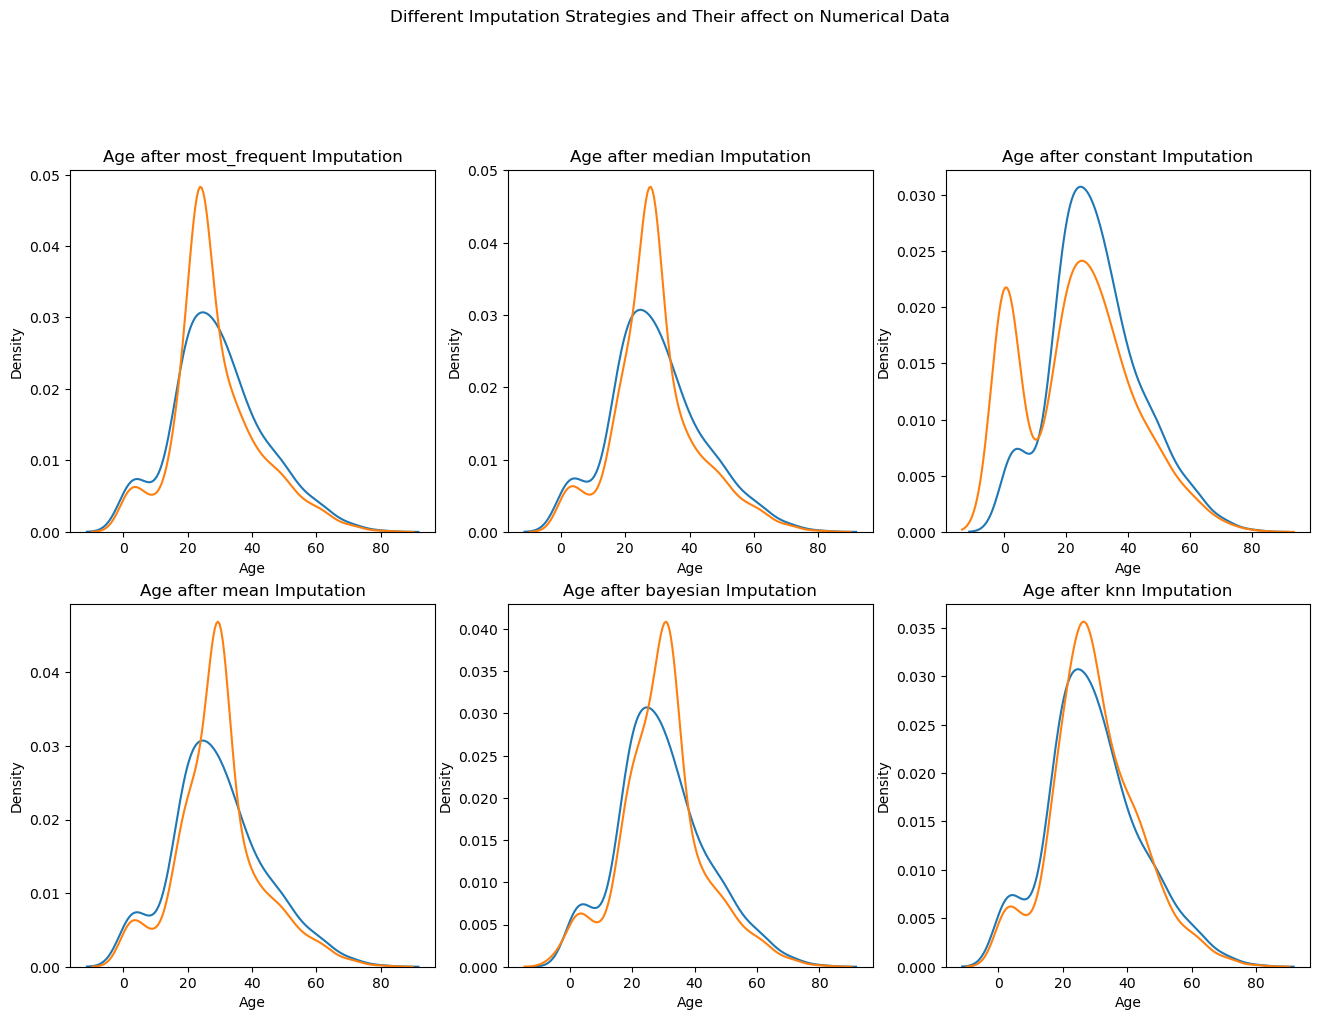

In [145]:
impact_of_imputation(titanic_df, "Age")

### Different Standardization Methods

There are several standardization methods for the job.

+ Min-max normalization: This method involves subtracting the minimum value of each feature from each value of that feature, and then dividing by the difference between the maximum and minimum values of that feature. This results in all features having a range of 0 to 1.
    + Pros: Min-max normalization is also easy to implement and understand. It is not as sensitive to outliers as z-score normalization, making it a good choice for data with outliers.
    - Cons: Min-max normalization can shrink the range of some features, which can make it difficult to see the differences between them.


+ StandardScaler: This is a more sophisticated method of standardization that is implemented in the Scikit-learn library. It uses a technique called robust scaling to minimize the impact of outliers.
    + Pros: StandardScaler is more robust to outliers than z-score normalization or min-max normalization. It is also a good choice for data with a mix of continuous and categorical features.
    - Cons: StandardScaler is more complex to implement than z-score normalization or min-max normalization.


+ Robust scaler: This method is similar to z-score normalization, but it is more robust to outliers. It works by subtracting the median of each feature from each value of that feature, and then dividing by the interquartile range (IQR) of that feature. This results in all features having a mean of 0 and a standard deviation of 1, but it is less affected by outliers.
    + Pros: Robust scaler is more robust to outliers than z-score normalization. It is also a good choice for data with a mix of continuous and categorical features.
    - Cons: Robust scaler is more complex to implement than z-score normalization.
    
    
| Method | Pros | Cons |
|---|---|---|
| Robust scaler | More robust to outliers than z-score normalization. Good choice for data with a mix of continuous and categorical features. | More complex to implement than z-score normalization. |
| Min-max normalization | Not as sensitive to outliers as z-score normalization. Easy to implement and understand. | Can shrink the range of some features. |
| StandardScaler | Similar to z-score normalization, but more robust to outliers. | More complex to implement than z-score normalization or min-max normalization. |


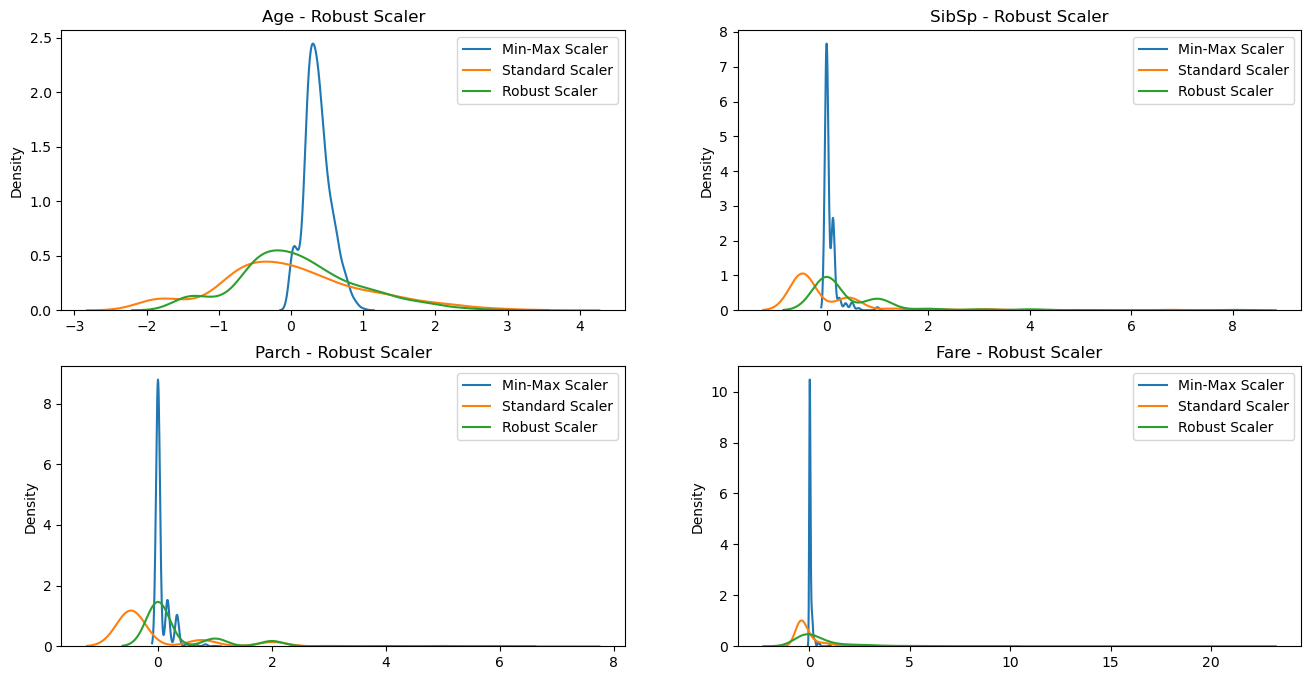

In [270]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def scale_and_plot(data, scalers, numerical_features):
    """Scales the data using the specified scalers and plots the distribution of the data after scaling.

    Args:
        data: The data to scale.
        scalers: A dictionary of scalers to use.
        numerical_features: The numerical features to scale.
    """

    fig, ax = plt.subplots(2, 2, figsize=(16, 8))

    for scaler_name, scaler in scalers.items():
        df = data.copy()
        scaled_data = scaler.fit_transform(df[numerical_features])
        for index, feature in enumerate(numerical_features):
            sns.kdeplot(scaled_data[:, index], ax=ax[index//2, index%2]).set_title(f"{feature} - {scaler_name}")
            ax[index//2, index%2].legend(list(scalers.keys()))
    
    plt.show()

scale_and_plot(titanic_df, {
        'Min-Max Scaler': MinMaxScaler(),
        'Standard Scaler': StandardScaler(),
        'Robust Scaler': RobustScaler()
    }, numerical_features = numerical_features)


## Trying different models on our dataset.

In [76]:
# Drop the Cabin and Name features
# titanic_df = titanic_df.drop(["Cabin", "Name"], axis=1)

# Create the X and y

## One-hot encode the categorical features
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_cat = onehot_encoder.fit_transform(titanic_df[categorical_features_2])

## Impute the missing values
bayesian_imputer = IterativeImputer()
X_num = bayesian_imputer.fit_transform(titanic_df[numerical_features])

## Scale the features
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(np.concatenate((X_cat, X_num), axis=1))
y = titanic_df["Survived"]

## Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Model scores:
RandomForestClassifier: 0.8156424581005587
Gradient Boosting: 0.8156424581005587
XGBoost: 0.8044692737430168
Light GBM: 0.7932960893854749
DecisionTreeClassifier: 0.7877094972067039
LogisticRegression: 0.7821229050279329
LinearSVC: 0.7653631284916201


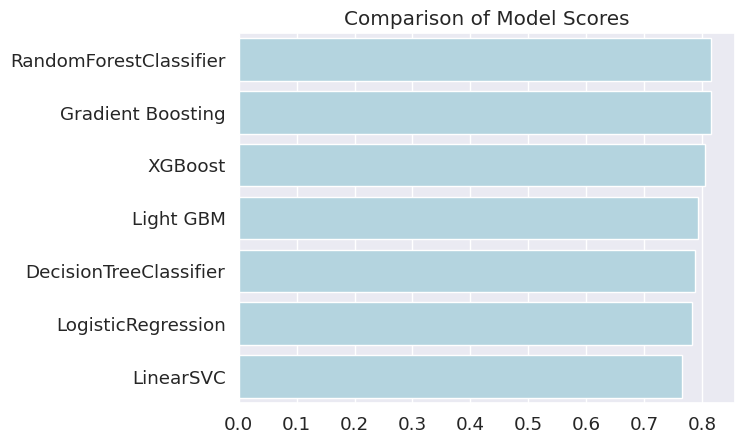

In [78]:
# importing models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# creating a model dictionary
models = {
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'LinearSVC': LinearSVC(random_state=42, max_iter=100000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Light GBM": LGBMClassifier(random_state=42),
}

# Training 
for model_name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate the models
scores = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    scores[model_name] = accuracy_score(y_test, y_pred)

# Sorting by score
scores = dict(sorted(scores.items(), 
                key=lambda x:x[1], reverse=True))
# Print the scores

print("Model scores:")
for model_name, score in scores.items():
    print(f"{model_name}: {score}")


# Plotting
sns.barplot(pd.DataFrame(scores, index=["Accuracy"]), 
            orient = 'h', color = "Lightblue").set_title("Comparison of Model Scores");

## Optimizing Further

In [352]:
# utility code for dropping columns
class DropColumns(object):
    def __init__(self, drop_columns):
        self.drop_columns = drop_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.drop(self.drop_columns, axis=1)
        return X

In [49]:
# Selecting X & y
X = titanic_df[numerical_features+categorical_features_2]
y = titanic_df.Survived

# Three set spliting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Drop the Cabin and Name features
# drop_columns = ["Cabin", "Name"]

# Setting up transformers 
numerical_transformer_2 = Pipeline( steps= [
    ("bayesian_imputer", bayesian_imputer),
    ("robust_scaler", RobustScaler())
])
    
# Categorical transformer
categorical_transformer_2 = Pipeline(steps= [
#     ("drop", DropColumns(drop_columns)),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
                                          ])

# Creating Preprocessor
preprocessor_2 = ColumnTransformer(transformers=[
    ('numerical_transformer', numerical_transformer_2, numerical_features),
    ('categorical_transformer', categorical_transformer_2, categorical_features_2),
])

In [56]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ("preprocessor_2", preprocessor_2), 
    ("gradboost", GradientBoostingClassifier(random_state = 42))
])

# Fit the model
# pipeline.fit(titanic_df.drop("Survived",axis = 1), titanic_df["Survived"])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor_2',
                 ColumnTransformer(transformers=[('numerical_transformer',
                                                  Pipeline(steps=[('bayesian_imputer',
                                                                   IterativeImputer()),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('categorical_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked'])])),
                ('gradboost', GradientBoostingClassifier(random_state=42))])

In [57]:
print(pipeline.score(X_test, y_test))

0.7877094972067039


In [65]:
pipeline["gradboost"].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [68]:
%%time

from sklearn.model_selection import GridSearchCV

params = {
    "gradboost__n_estimators": [10, 100, 1000],
    "gradboost__learning_rate": [0.01, 0.1, 1.0],
    "gradboost__max_depth": [3, 5, 10],
    "gradboost__min_samples_split": [2, 5, 10],
    "gradboost__min_samples_leaf": [1, 2, 5],
}

grid_search = GridSearchCV(pipeline, params, 
                           cv=5,
                          verbose=2)
grid_search.fit(X, y)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END gradboost__learning_rate=0.01, gradboost__max_depth=3, gradboost__min_samples_leaf=1, gradboost__min_samples_split=2, gradboost__n_estimators=10; total time=   0.1s
[CV] END gradboost__learning_rate=0.01, gradboost__max_depth=3, gradboost__min_samples_leaf=1, gradboost__min_samples_split=2, gradboost__n_estimators=10; total time=   0.1s
[CV] END gradboost__learning_rate=0.01, gradboost__max_depth=3, gradboost__min_samples_leaf=1, gradboost__min_samples_split=2, gradboost__n_estimators=10; total time=   0.1s
[CV] END gradboost__learning_rate=0.01, gradboost__max_depth=3, gradboost__min_samples_leaf=1, gradboost__min_samples_split=2, gradboost__n_estimators=10; total time=   0.1s
[CV] END gradboost__learning_rate=0.01, gradboost__max_depth=3, gradboost__min_samples_leaf=1, gradboost__min_samples_split=2, gradboost__n_estimators=10; total time=   0.1s
[CV] END gradboost__learning_rate=0.01, gradboost__max_depth=3, gr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor_2',
                                        ColumnTransformer(transformers=[('numerical_transformer',
                                                                         Pipeline(steps=[('bayesian_imputer',
                                                                                          IterativeImputer()),
                                                                                         ('robust_scaler',
                                                                                          RobustScaler())]),
                                                                         ['Age',
                                                                          'SibSp',
                                                                          'Parch',
                                                                          'Fare']),
                                                                        ('categorical_transformer',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked'])])),
                                       ('gradboost',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'gradboost__learning_rate': [0.01, 0.1, 1.0],
                         'gradboost__max_depth': [3, 5, 10],
                         'gradboost__min_samples_leaf': [1, 2, 5],
                         'gradboost__min_samples_split': [2, 5, 10],
                         'gradboost__n_estimators': [10, 100, 1000]},
             verbose=2)

In [74]:
grid_search.best_score_

0.8350574351892537

In [79]:
grid_search.best_params_

{'gradboost__learning_rate': 0.01,
 'gradboost__max_depth': 5,
 'gradboost__min_samples_leaf': 5,
 'gradboost__min_samples_split': 2,
 'gradboost__n_estimators': 1000}

In [81]:
# # rfc_optimised = RandomForestClassifier(
# #     n_estimators = 1900,
# #     min_samples_split = 2,
# #     min_samples_leaf = 6,
# #     max_leaf_nodes = 8,
# #     criterion = 'entropy',
# #     n_jobs = -1)

# # final_pipeline = Pipeline(steps = [
# #     ('preprocessor', preprocessor),
# #     ('rfc_optimised', rfc_optimised),
# # ])

# # final_pipeline.fit(X, y)


predictions = grid_search.predict(test_df)
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## References
1. [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic/overview)
2. [Titanic Tutorial](https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook) by [Alexis Cook](https://www.kaggle.com/alexisbcook)
3. [Complete Machine Learning and Data Science Bootcamp](https://zerotomastery.io/courses/machine-learning-and-data-science-bootcamp/) by [ZTM](https://zerotomastery.io/)
4. [Iterative Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html)